# Machine Learning - Exercise 7
# Classification Evaluation with ANNs

This exercise illustrates examples of evaluation of solutions of classification problems using ANNs.

##Import 

Import libraries that contains the implementations of the functions used in the rest of the program.



In [ ]:
import random
import numpy as np
import keras
import sklearn.metrics 
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_score, ShuffleSplit, GridSearchCV
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.multiclass import unique_labels
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        pass
        #print('Confusion matrix, without normalization')

    #print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    ax.set_ylim(len(classes)-0.5, -0.5)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

print("Libraries imported.")

Libraries imported.


## Load data

Load training data.

Choose one of the datasets described in the next subsections.

More details on these datasets are available in https://scikit-learn.org/stable/datasets/index.html


### IRIS dataset

In [ ]:
DB = datasets.load_iris()
dataset_name = "Iris"

### Wine dataset

In [ ]:
DB = datasets.load_wine()
dataset_name = "Wines"

###Digits dataset

In [ ]:
DB = datasets.load_digits()
dataset_name = "Digits"

###Summary of the dataset

Print some information about the dataset

In [ ]:
class_names = np.array([str(c) for c in DB.target_names])
X_all = DB.data
y_all = DB.target

print(X_all.shape)
print(y_all.shape)

ninput = X_all.shape[1]
nsamples = X_all.shape[0]

print("Dataset: %s" %(dataset_name))
print("Number of attributes/features: %d" %(ninput))
print("Number of classes: %d %s" %(len(class_names), str(class_names)))
print("Number of samples: %d" %(nsamples))

(1797, 64)
(1797,)
Dataset: Digits
Number of attributes/features: 64
Number of classes: 10 ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']
Number of samples: 1797


### Show an example

Display a random sample.

In [ ]:
id = random.randrange(0,X_all.shape[0])

print("x%d = %r" %(id,X_all[id]))
print("y%d = %r ['%s']" %(id,y_all[id],class_names[y_all[id]]))

x903 = array([ 0.,  0.,  0., 10., 13.,  5.,  0.,  0.,  0.,  3., 14., 16., 12.,
       15.,  0.,  0.,  0., 10., 16.,  8., 11., 16.,  0.,  0.,  0.,  8.,
       14.,  5., 14.,  9.,  0.,  0.,  0.,  0.,  7., 14., 16.,  5.,  0.,
        0.,  0.,  0.,  0., 11., 16., 16.,  1.,  0.,  0.,  0.,  0., 14.,
       16., 16.,  4.,  0.,  0.,  0.,  0., 11., 16., 11.,  0.,  0.])
y903 = 8 ['8']


##Split data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.333, 
                                                    random_state=14)

print("Size of training set: %d" %X_train.shape[0])
print("Size of test set: %d" %X_test.shape[0])

Size of training set: 1198
Size of test set: 599


##Create a Model 

Model fitting = finding a solution that is stored in the model.

IMPORTANT: solution depends on data split

**Neural Network**

In [ ]:
model = keras.models.Sequential([
  keras.layers.Dense(64, input_dim=ninput, activation='relu'),
  keras.layers.Dense(32, activation='relu'),
  # keras.layers.Dropout(0.2),
  keras.layers.Dense(len(class_names), activation='softmax')
])

optimizers = [keras.optimizers.SGD(lr = 0.01, momentum = 1.0), 'adadelta', 'adam']

model.compile(optimizer=optimizers[1],
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

print(model.summary())


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_6 (Dense)              (None, 10)                330       
Total params: 6,570
Trainable params: 6,570
Non-trainable params: 0
_________________________________________________________________
None


## Fit the model

In [ ]:
model.fit(X_train, y_train, batch_size=128, epochs=20)

Epoch 1/20
1198/1198 [==============================] - 0s 192us/step - loss: 3.3186 - acc: 0.2421
Epoch 2/20
1198/1198 [==============================] - 0s 29us/step - loss: 1.4319 - acc: 0.5543
Epoch 3/20
1198/1198 [==============================] - 0s 31us/step - loss: 0.8530 - acc: 0.7462
Epoch 4/20
1198/1198 [==============================] - 0s 30us/step - loss: 0.5870 - acc: 0.8381
Epoch 5/20
1198/1198 [==============================] - 0s 28us/step - loss: 0.4348 - acc: 0.8840
Epoch 6/20
1198/1198 [==============================] - 0s 32us/step - loss: 0.3505 - acc: 0.9073
Epoch 7/20
1198/1198 [==============================] - 0s 35us/step - loss: 0.2790 - acc: 0.9290
Epoch 8/20
1198/1198 [==============================] - 0s 34us/step - loss: 0.2347 - acc: 0.9391
Epoch 9/20
1198/1198 [==============================] - 0s 33us/step - loss: 0.2075 - acc: 0.9533
Epoch 10/20
1198/1198 [==============================] - 0s 37us/step - loss: 0.1740 - acc: 0.9591
Epoch 11/20
1198/1

##Predict on test set

Use test set for prediction.

In [ ]:
y_pred_sm = model.predict(X_test)
y_pred = np.argmax(y_pred_sm, axis=1)

##Evaluate the Model

Evaluation of a specific solution.

### Accuracy

In [ ]:
acc = model.evaluate(X_test, y_test)    
print("Accuracy %.3f" %acc[-1])

599/599 [==============================] - 0s 112us/step
Accuracy 0.943


###Precision & Recall

In [ ]:
print(classification_report(y_test, y_pred, labels=None, target_names=class_names, digits=3))


              precision    recall  f1-score   support

           0      0.982     0.982     0.982        55
           1      0.734     1.000     0.847        47
           2      0.962     1.000     0.981        51
           3      0.947     0.982     0.964        55
           4      1.000     0.952     0.976        63
           5      0.947     0.964     0.956        56
           6      0.968     1.000     0.984        61
           7      0.941     0.970     0.955        66
           8      1.000     0.697     0.821        66
           9      0.974     0.937     0.955        79

    accuracy                          0.943       599
   macro avg      0.946     0.948     0.942       599
weighted avg      0.951     0.943     0.942       599



### Confusion Matrix

[[54  0  0  0  0  0  1  0  0  0]
 [ 0 47  0  0  0  0  0  0  0  0]
 [ 0  0 51  0  0  0  0  0  0  0]
 [ 0  0  1 54  0  0  0  0  0  0]
 [ 0  1  0  0 60  0  0  2  0  0]
 [ 0  1  0  1  0 54  0  0  0  0]
 [ 0  0  0  0  0  0 61  0  0  0]
 [ 1  0  0  0  0  1  0 64  0  0]
 [ 0 13  1  1  0  1  1  1 46  2]
 [ 0  2  0  1  0  1  0  1  0 74]]


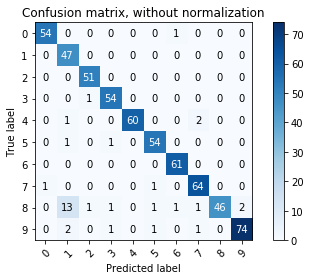

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=None, sample_weight=None)
print(cm)
plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=False)

In [ ]:
if dataset_name == "Iris":
  xnew = np.array([8.5, 2.6, 9.2, 0.3])
elif dataset_name == "Wines":
  xnew = np.array([12, 2.5, 2.6, 15, 186, 1.5, 9.1,
                   0.44, 2.2, 5.6, 2.9, 3.7, 380])
elif dataset_name == "Digits":
   xnew = np.array([  
        0,  0,  8, 13, 18, 13, 11,  1,  0, 10,  9,  4,  6,
       16,  3,  0,  0,  0,  0, 10,  1, 13,  0,  0,  0,  0,
        0,  7, 14,  2,  0,  0,  0,  0,  0,  7, 13,  1,  0,
        0,  0,  0,  0,  0,  8, 13,  1,  0,  0,  0,  0,  0,
       13,  6,  7,  1,  0,  0, 14, 12, 13,  1,  0,  0])

xnew = xnew.reshape(1,-1)

print("x_new = %r" %(xnew))
ynew = np.argmax(model.predict(xnew))
print("y_pred = %d %s" %(ynew, class_names[ynew]))


x_new = array([[ 0,  0,  8, 13, 18, 13, 11,  1,  0, 10,  9,  4,  6, 16,  3,  0,
         0,  0,  0, 10,  1, 13,  0,  0,  0,  0,  0,  7, 14,  2,  0,  0,
         0,  0,  0,  7, 13,  1,  0,  0,  0,  0,  0,  0,  8, 13,  1,  0,
         0,  0,  0,  0, 13,  6,  7,  1,  0,  0, 14, 12, 13,  1,  0,  0]])
y_pred = 3 3


##Common Mistake

Evaluate solution on data used for training!!!


In [ ]:
scores = model.evaluate(X_all,y_all)
acc = scores[1]
print('Accuracy: %f' %acc)

1797/1797 [==============================] - 0s 48us/step
Accuracy: 0.966055
